# Choose Your ML Problem and Data

In this unit's lab you will implement a model to solve a machine learning problem of your choosing. You will first have to make some decisions. These include:

1. Choosing your data set
2. Identifying your problem type: is it a classification or regression problem?
3. Picking a prediction task 
4. Identifying your label and features
5. Selecting your model
6. Determining data preparation and feature engineering that is needed to build a balanced modeling data set for your problem and model, such as: 
    * creating binary variables
    * addressing missingness, such as replacing missing values with means
    * renaming features and labels
    * finding and replacing outliers
    * performing winsorization if needed
    * performing one-hot encoding on categorical features
    * performing vectorization for an NLP problem
    * addressing class imbalance in your data sample
7. Selecting appropriate techniques to evaluate your model's performance and improve your model


Before you can begin to formulate your machine learning problem, you must select a data set and choose a predictive problem that this data set supports.

In this exercise you will choose your data set, and inspect, analyze and visualize the data with your predictive modeling problem and machine learning model in mind.

### Import Packages

Before you get started, import a few packages. You can import additional packages that you have used in this course that you may need for this task.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Choose Your Data Set and Load the Data


You will have the option to choose one of three data sets that you have worked with in this program:

* The "adult" data set that contains Census information from 1994: `adultDataFull.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load the Data Set

The code cell below contains filenames (path + filename) for each of the three data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# Filenames of the three data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "adultDataFull.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")

df = pd.read_csv(airbnbDataSet_filename, header=0)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Step 2: Choose Your Predictive Problem and Label 

Now that you have chosen your data set, you can choose what you would like to predict, i.e. the label.

<b>Task:</b> Once you have chosen your label, use visualization techniques you have learned to plot the data distribution of the label column's values. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


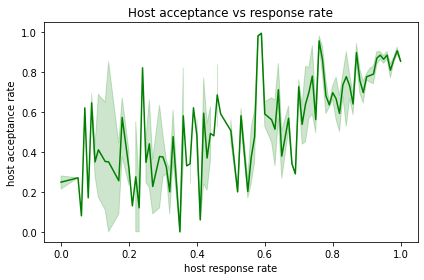

In [3]:
response = df['host_response_rate']
acceptance = df['host_acceptance_rate']
sns.lineplot(x=response, y=acceptance, color = 'g')
plt.title("Host acceptance vs response rate")
plt.xlabel("host response rate")
plt.ylabel("host acceptance rate")
plt.tight_layout()
plt.show()

## Step 3: Inspect and Analyze the Data

The next step is to inspect and analyze your data with your machine learning problem in mind, and formulate a plan to prepare your data to create a modeling data set that is appropriate for your problem.

While you will draft your plan to build a modeling data set and implement your model in the written portion of the assignment, you will use this notebook to analyze your data and come up with a data preparation and feature engineering plan. <b>Note:</b> This notebook should be used for investigation and analysis. You will implement data preparation techniques to build your modeling data set in your lab assignment.

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. 

As you are investigating your data, consider the machine learning model you would like to build for this problem, and consider different data preparation and feature engineering techniques that you will need to use.


<b>Task</b>: 

Use the techniques you have learned in this course to inspect and analyze your data. You can add code cells to accomplish this by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.



In [4]:
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,120.721287,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


In [5]:
feature_list = list(df.select_dtypes(include="float64"))
feature_list

['host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [6]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [7]:
outliers = find_outliers_IQR(df['host_response_rate'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
outliers


number of outliers: 2448
max outlier value: 0.84
min outlier value: 0.0


0        0.80
1        0.09
12       0.00
13       0.80
14       0.00
         ... 
27872    0.78
27904    0.83
27929    0.43
27944    0.38
27952    0.64
Name: host_response_rate, Length: 2448, dtype: float64

In [9]:
outliers = find_outliers_IQR(df[['host_response_rate','host_acceptance_rate']])
outliers

,host_response_rate,host_acceptance_rate
0,0.80,0.17
1,0.09,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
28017,NaN,NaN
28018,NaN,NaN
28019,NaN,NaN
28020,NaN,NaN


In [10]:
def drop_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   outliers_dropped = outliers.dropna().reset_index()
   return outliers_dropped

In [12]:
df_dropped = drop_outliers_IQR(df[['host_response_rate','host_acceptance_rate']])
df_dropped

,index,host_response_rate,host_acceptance_rate
0,0,0.80,0.17
1,14,0.00,0.00
2,28,0.50,0.09
3,38,0.50,0.00
4,44,0.00,0.00
...,...,...,...
566,26314,0.80,0.14
567,26348,0.80,0.09
568,27337,0.40,0.13
569,27746,0.18,0.18


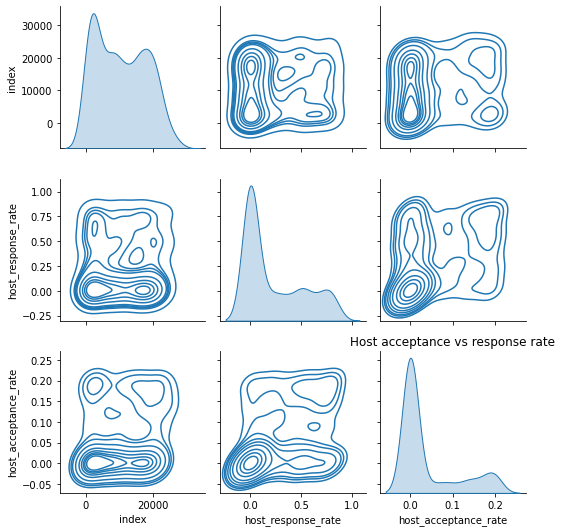

In [19]:
sns.pairplot(df_dropped,kind="kde")
plt.title("Host acceptance vs response rate")
plt.xlabel("host response rate")
plt.ylabel("host acceptance rate")
plt.tight_layout()
plt.show()

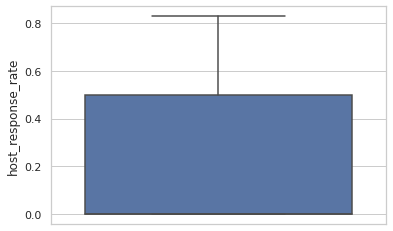

In [22]:
sns.boxplot(y=df_dropped["host_response_rate"])
plt.show()

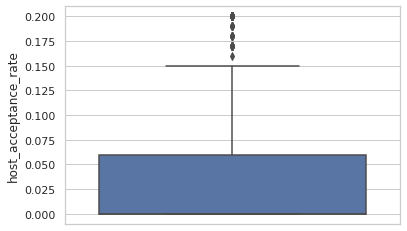

In [23]:
sns.boxplot(y=df_dropped["host_acceptance_rate"])
plt.show()